In [423]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt


##### import the dataset

In [454]:
# Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction 
# of Graduate Admissions, 
# IEEE International Conference on Computational Intelligence in Data Science 2019
# Link to the dataset: https://www.kaggle.com/mohansacharya/graduate-admissions
# https://www.kaggle.com/mohansacharya/graduate-admissions/notebooks
data=pd.read_csv('project/Admission_Predict.csv')

In [425]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


##### inspecting the data

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [427]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##### We see no nulls rows/columns

##### lets look at correlation among columnar data

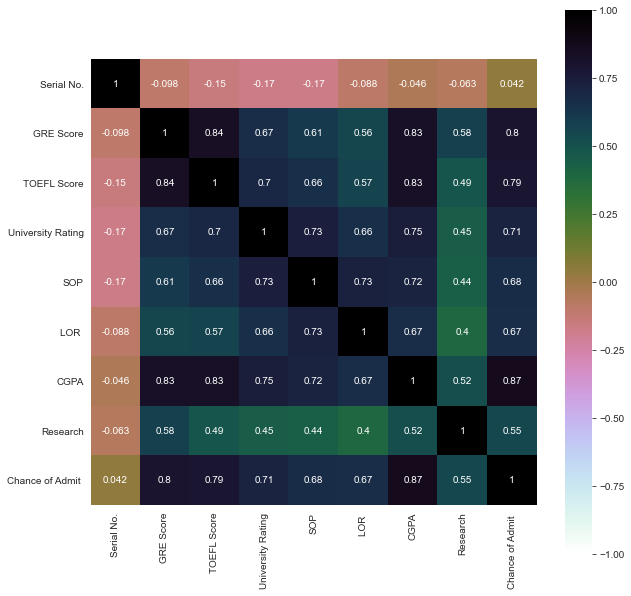

In [428]:
fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

##### `Serial No.` does not correlate with any other column data, so I'll remove it.

##### Renaming columns to something simple and dropping some column

In [429]:
data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UniR','Chance of Admit ':'CoA'},inplace=True)
data.drop('Serial No.', axis=1, inplace=True)
data

,GRE,TOEFL,UniR,SOP,LOR,CGPA,Research,CoA
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


##### Use the describe() on dataframe to visualize properties of data

In [430]:
data.corr()

,GRE,TOEFL,UniR,SOP,LOR,CGPA,Research,CoA
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
UniR,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
CoA,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

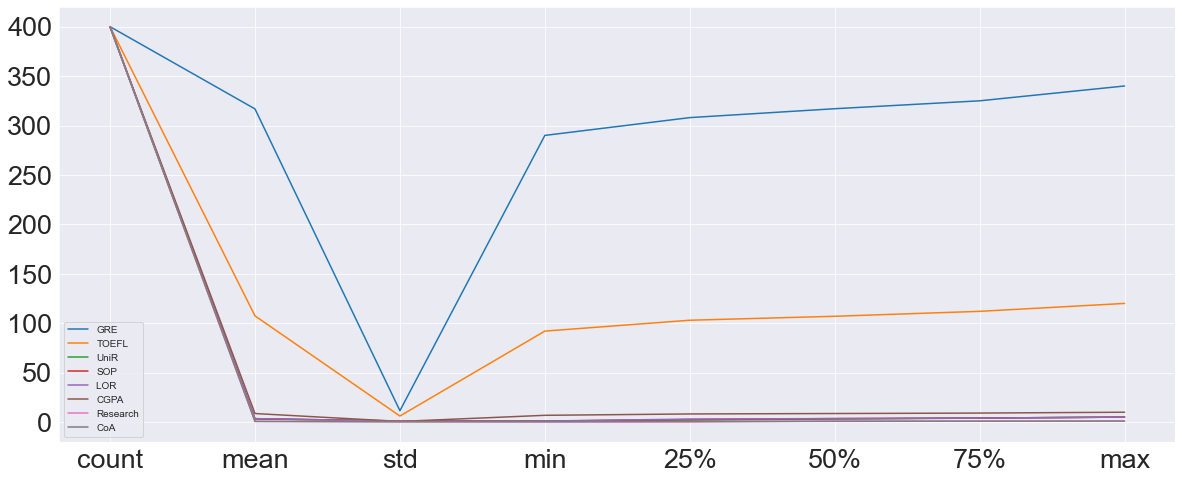

In [431]:
# https://stackoverflow.com/questions/30263627/python-pandas-summary-table-plot
data.describe().plot(fontsize=27, figsize = (20,8))

######  box plot shows us the min,median and max values for GRE,TOEFL,University rating and CGPA for the dataset.

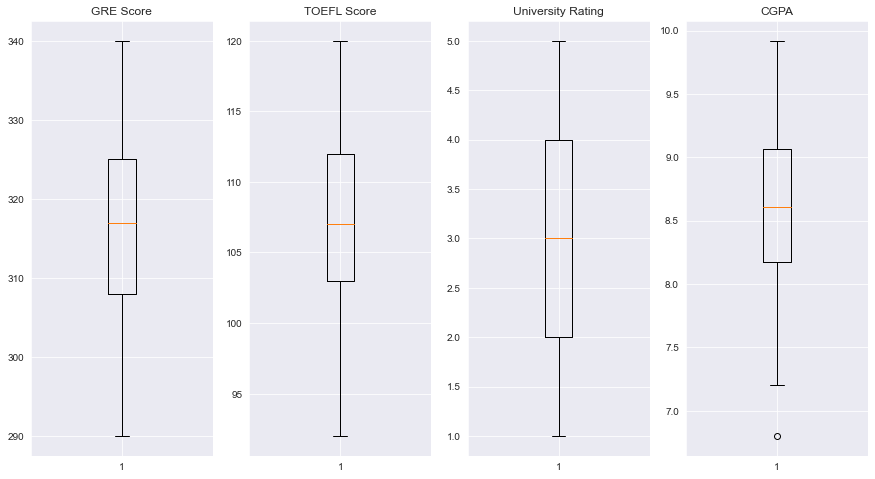

In [432]:
plt.figure(1, figsize=(15,8))
plt.subplot(1,4,1)
plt.boxplot(data['GRE'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(data['TOEFL'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(data['UniR'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(data['CGPA'])
plt.title('CGPA')

plt.show()

##### Lets look at correlations between the features and the chance of admission to the university

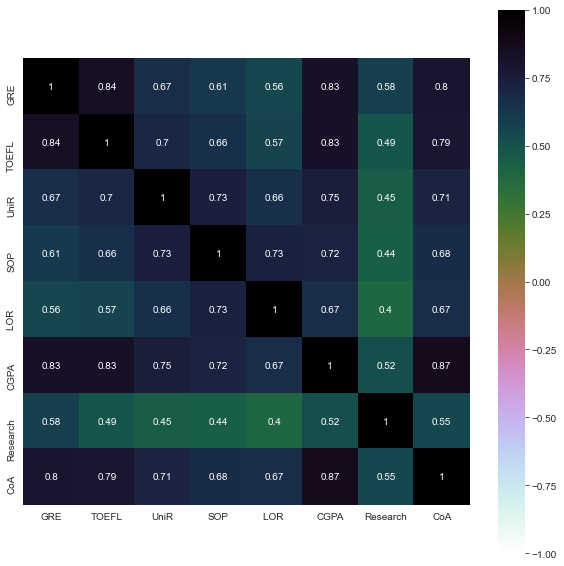

In [433]:
fig=plt.gcf()
fig.set_size_inches(10,10)
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig=sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

##### Plotting histogram of data

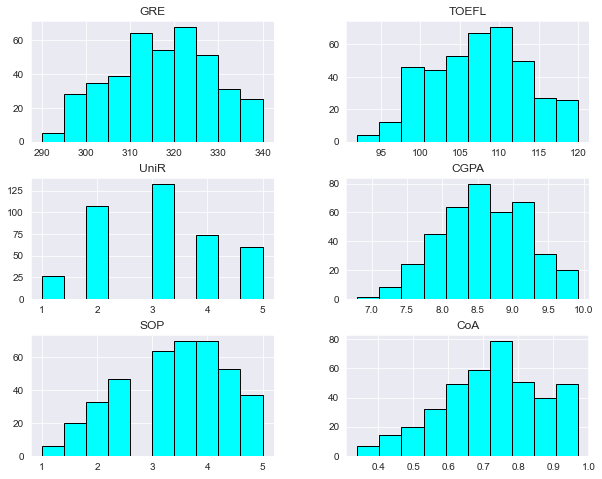

In [434]:
data[['GRE','TOEFL','UniR','CGPA', 'SOP', 'CoA']].hist(figsize=(10,8),bins=10,color='cyan',linewidth='1',edgecolor='k')

plt.show()

#### importance of research to getting an admit

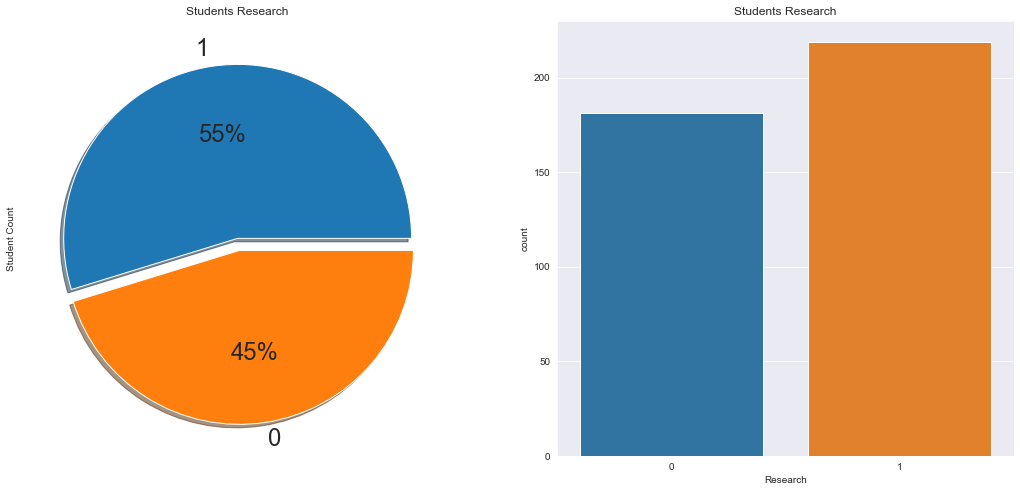

In [435]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Research'].value_counts().plot.pie(explode=[0,0.07],autopct='%0.0f%%',ax=ax[0],shadow=True,textprops={'fontsize': 24})
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot(x='Research',data=data,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

#### Next we will map CoA (Chance of Admit) > 0.75 as 1 and try to plot scatterplot for GRE and TOEFL

In [436]:
def map75pCoAToAdmit(row):
    if row['CoA'] >0.75 :
        return 1
    else :
        return 0
data['Admit'] = data.apply(map75pCoAToAdmit,axis=1)

<AxesSubplot:xlabel='GRE', ylabel='TOEFL'>

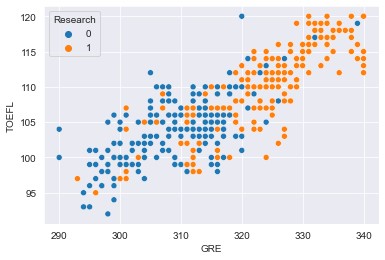

In [437]:
sns.scatterplot(data=data,x='GRE',y='TOEFL',hue='Research')

<AxesSubplot:xlabel='GRE', ylabel='CGPA'>

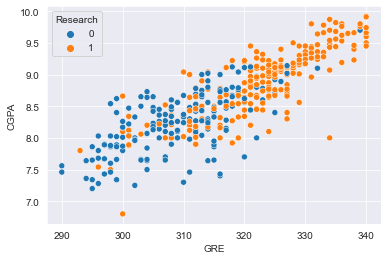

In [438]:
sns.scatterplot(data=data,x='GRE',y='CGPA',hue='Research')

###### We can see that stutents who have done research do have good TOEFL and GRE Score.

#### We look at whether doing research co-relates with Admit.

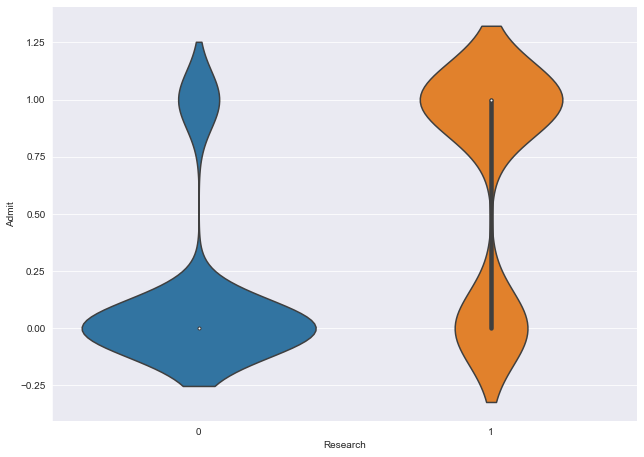

In [439]:
sns.set_style(style='darkgrid')
# https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(x='Research',y='Admit',data=data,kind="violin", height=6.27, aspect=11.7/8.27)
plt.show()

#### Lets see how Research vs Everything else correlate to Admit

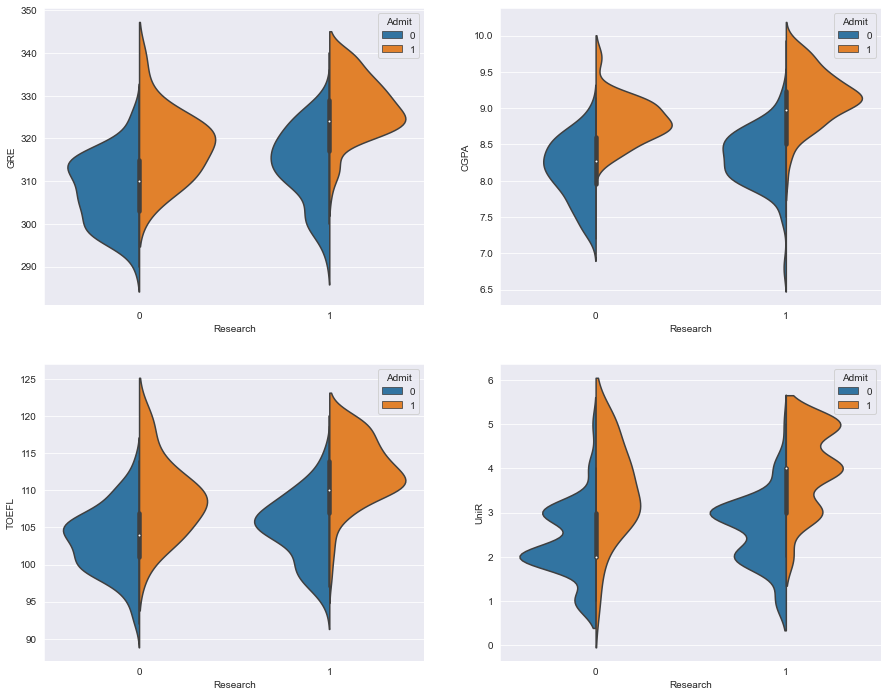

In [440]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.violinplot("Research","GRE",hue="Admit", data=data,split=True)
plt.subplot(2,2,2)
sns.violinplot("Research","CGPA",hue="Admit", data=data,split=True)
plt.subplot(2,2,3)
sns.violinplot("Research","TOEFL",hue="Admit", data=data,split=True)
plt.subplot(2,2,4)
sns.violinplot("Research","UniR",hue="Admit", data=data,split=True)
plt.ioff()
plt.show()

###### We can  conclude that your chance of Admission increases if you do Research.

##### We can clearly see that the student with research have higher chance of admission and their overall all GRE,TOEFL and CPGA scores are also high.

###### What should be your Scores for 95 % Chance of Admission?

In [441]:
data_sort=data.sort_values(by=data.columns[-1],ascending=False)
data_sort.head()

,GRE,TOEFL,UniR,SOP,LOR,CGPA,Research,CoA,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
129,333,118,5,5.0,5.0,9.35,1,0.92,1
186,317,107,3,3.5,3.0,8.68,1,0.84,1
187,335,118,5,4.5,3.5,9.44,1,0.93,1
188,331,115,5,4.5,3.5,9.36,1,0.93,1


In [442]:
data_sort[(data_sort['CoA']>0.95)].mean().reset_index()

,index,0
0,GRE,337.454545
1,TOEFL,117.272727
2,UniR,4.636364
3,SOP,4.545455
4,LOR,4.500000
5,CGPA,9.787273
6,Research,1.000000
7,CoA,0.963636
8,Admit,1.000000


##### For having a 95% Chance to get admission one should have `GRE=337.45`, `TOEFL=117.27`, `SOP=4.54`, `LOR=4.5`, `CGPA=9.78`.

#### Linear Regression

In [443]:
data['Admit'] = data.apply(map75pCoAToAdmit,axis=1)
data
print(data.iloc[0:,:].values)
print(data.iloc[:,:-2].values)

[[337.   118.     4.   ...   1.     0.92   1.  ]
 [324.   107.     4.   ...   1.     0.76   1.  ]
 [316.   104.     3.   ...   1.     0.72   0.  ]
 ...
 [330.   116.     4.   ...   1.     0.91   1.  ]
 [312.   103.     3.   ...   0.     0.67   0.  ]
 [333.   117.     4.   ...   1.     0.95   1.  ]]
[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [333.   117.     4.   ...   4.     9.66   1.  ]]


In [444]:
X=data.iloc[0:,:7].values
print(X[0])
print(X[5])
print(X[35])
print(X[15])

[337.   118.     4.     4.5    4.5    9.65   1.  ]
[330.   115.     5.     4.5    3.     9.34   1.  ]
[320.  110.    5.    5.    5.    9.2   1. ]
[314.  105.    3.    3.5   2.5   8.3   0. ]


In [445]:
y=data.iloc[:,-2].values
print(y[0])
print(y[5])
print(y[35])
print(y[15])

0.92
0.9
0.88
0.54


##### Splitting the data into training and test data using test size of 0.05

In [446]:
len(y)

400

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=0)

In [448]:
print(y_test.size)
print(X_train.size)
print(X_test.size)
print(y_train.size)

20
2660
140
380


In [449]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
lrmodel = Pipeline([('scaler',MinMaxScaler()),('clf',linear_model.LinearRegression())])

lrmodel.fit(X_train, y_train)
pred = model1.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
Rsq = metrics.r2_score(y_test, pred)

print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))
# y=data.iloc[:,-2].values
Score=X[0]
Score=pd.DataFrame(Score).T
predicted_chance=lrmodel.predict(Score)
print('actual: ', y[0],' predicted: ', predicted_chance)

Score=X[5]
Score=pd.DataFrame(Score).T
predicted_chance=lrmodel.predict(Score)
print('actual: ', y[5],' predicted: ', predicted_chance)

Score=X[35]
Score=pd.DataFrame(Score).T
predicted_chance=lrmodel.predict(Score)
print('actual: ', y[35],' predicted: ', predicted_chance)

MSE:0.005072474069100768  RMSE:0.07122130347796767  R-Squared:0.7004916114135116
actual:  0.92  predicted:  [0.95136698]
actual:  0.9  predicted:  [0.86662147]
actual:  0.88  predicted:  [0.86087749]


##### our linear regression algrothim predicts the values as follows 
```
0.95 against the actual value 0.92
0.86 against the actual value 0.90
0.86 against the actual value 0.88
```

<Figure size 1080x432 with 0 Axes>

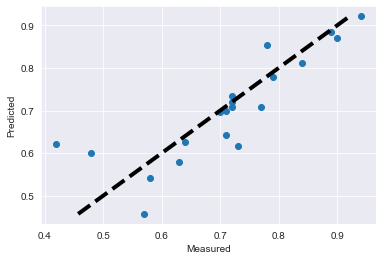

In [450]:
# https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html
plt.figure(figsize=(15,6))
y=pred
y1=y_test
fig, ax = plt.subplots()
ax.scatter(y1, pred1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Lets predict!

In [451]:
print('My chances are {}%'.format(round(lrmodel.predict([[305, 108, 4.5, 4.5, 4.5, 9.23, 0]])[0]*100, 1)))

My chances are 79.6%


##### Feature Importance

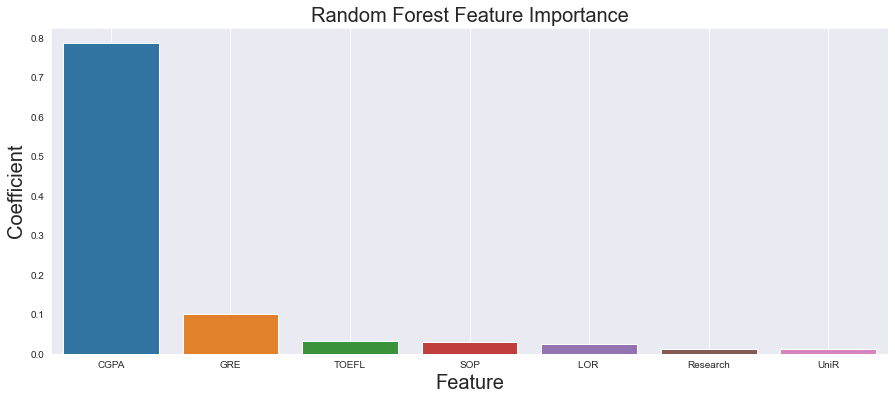

In [452]:
data['Admit'] = data.apply(map75pCoAToAdmit,axis=1)
from sklearn.ensemble import RandomForestRegressor
columns = ['Admit']
data.drop(columns, inplace=True, axis=1)
X = data.drop('CoA',axis = 1)
y = data['CoA']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Coefficient','Feature'])
plt.figure(figsize=(15, 6))
sns.barplot(x="Feature", y="Coefficient", data=feature_importance.sort_values(by="Coefficient", ascending=False))
plt.ylabel('Coefficient',fontsize=20)
plt.xlabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=20)
plt.grid()

<AxesSubplot:xlabel='Feature', ylabel='Coefficient'>

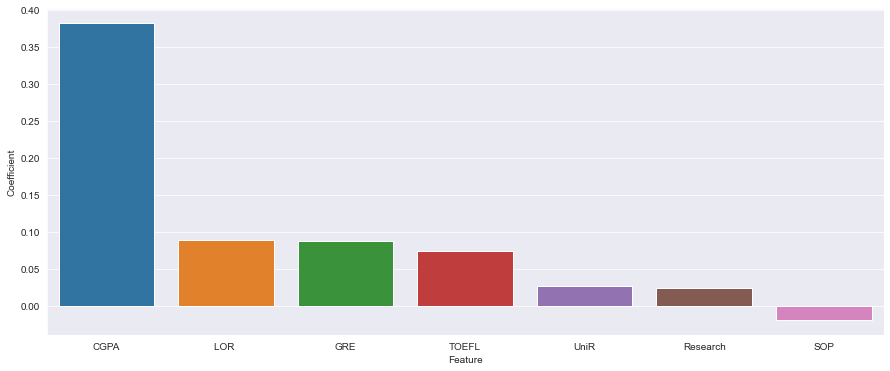

In [453]:
coef_df1 = pd.DataFrame(zip(X_train.columns,lrmodel.named_steps['clf'].coef_),columns=['Feature','Coefficient'])
coef_df1.sort_values(by='Coefficient',inplace=True, ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='Feature',y='Coefficient',data=coef_df1)
# coef_df1